<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_17_Distribuci%C3%B3n_binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución binomial

# Objetivo

Calcular probabilidades, valor esperado y dispersión de datos de una distribución binomial


# Descripción

Se identifican ejercicios casos de la literatura de **distribuciones de probabilidad binomial** y se realizan cálculos de probabilidades, se visualiza la densidad el diagrama de barra y la probabilidad acumulada determinan el valor esperado y se calcula la varianza y la desviación estándar.





# Fundamento teórico

El experimento de lanzar al aire una moneda es un ejemplo sencillo de una variable aleatoria binomial. Muchos experimentos prácticos resultan en datos similares a que salga cara o cruz al tirar la moneda (Mendenhall, Beaver, and Beaver 2006)

Un experimento binomial es el que tiene estas cinco características:

- El experimento consiste en n
 intentos idénticos.

- Cada intento resulta en uno de dos resultados, el resultado uno se llama éxito, $S$, y el otro se llama fracaso, $F$.

- La probabilidad de éxito en un solo intento es igual a p y es igual de un intento a otro.

- La probabilidad de fracaso es igual a q=(1−p).

- Los intentos son independientes.

El interés es el valor de $x$ , o sea, el número de éxitos observado durante los n
 intentos, para x=0,1,2,…,n. (Mendenhall, Beaver, and Beaver 2006).

Un experimento de Bernoulli puede tener como resultado un éxito con probabilidad $p$ y un fracaso con probabilidad $q=1−p$.

Entonces, la distribución de probabilidad de la variable aleatoria binomial $x$
, el número de éxito $k$
 en $n$  ensayos independientes (Walpole, Myers, and Myers 2012):

La distribución binomial se utiliza para modelar el número de éxitos en una secuencia de ensayos independientes, donde cada ensayo tiene solo dos resultados posibles: éxito o fracaso.

La distribución binomial se caracteriza por dos parámetros: $n$ (el número de ensayos) y $p$ (la probabilidad de éxito en un solo ensayo).

Para realizar un ejercicio en Python con la distribución binomial, se puede utilizar la biblioteca *scipy.stats* y estas funciones:

- Función de probabilidad *binom.pmf(k, n, p)*
- Función acumulada *binom.cdf(k, n, p)*

- Función para generar números aleatorios *binom.rvs(n, p, size=100)*

## Fórmulas de distribución binomial

### Fórmula de probabilidad
$$
f(x) = prob(x=k) = \binom{n}{k} \cdot p^{k} \cdot q^{(n-k)}
$$

Para $x = 0,1,2,3...n$

y recordando las combinaciones cuantos éxitos $k$ en $n$ ensayos. Interpretar que $x = k$ para la fórmula. Al final el cálculo de la probabildia queda:

$$
f(x) = \binom{n}{k} = \frac{n!}{k!\cdot(n-k)!} \cdot p^{k} \cdot q^{(n-k)}
$$

### La función acumulada es:

$$
F(x) =
\sum_{0}^{n}f.x_i
$$

### Valor esperado

El valor esperado está dado por: $$\mu = n \cdot p$$


### Varianza y desviación estándar

La varianza y la desviación estándar se determinan mediante:

$$
\sigma^{2} = n \cdot p \cdot(1-p)
$$
y

$$
\sigma = \sqrt{\sigma^{2}}
$$

# Desarrollo



## Cargar librerías



In [14]:
# Se cargan librerías adecuadas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

import pandas as pd

## Crear funciones



In [15]:
def f_tabla_binomial (xi, n, p):
  # Calcular las probabilidades para cada valor de x
  probabilidades = [binom.pmf(x, n, p) for x in xi]

  # Calcular las probabilidades acumuladas
  probabilidades_acumuladas = [binom.cdf(x, n, p) for x in xi]

  # Crear un DataFrame para la tabla de probabilidades
  tabla_probabilidades = pd.DataFrame({'x': x, 'P(X = x)': probabilidades, 'P(X <= x)': probabilidades_acumuladas})

  # Mostrar la tabla de probabilidades
  #print(tabla_probabilidades)
  return (tabla_probabilidades)
def f_graficos_probabilidad_discreta(tabla):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['P(X = x)'], color='skyblue')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad')

    # Gráfico lineal de probabilidad acumulada
    plt.subplot(1, 2, 2)
    plt.plot(df.index, df['P(X <= x)'], marker='o', color='green')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad Acumulada')
    plt.title('Gráfico Lineal de Probabilidad Acumulada')

    plt.tight_layout()
    plt.show()

def f_graficos_probabilidad_discreta_VE_ds(tabla, VE, ds):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['P(X = x)'], color='skyblue')

    # El Valor esperado y desviación izq y der
    # Agregar una línea punteada
    plt.axvline(x=VE, color='red', linestyle='--', label='VE='+str(np.round(VE, 2)))
    plt.axvline(x=VE - ds, color='blue', linestyle='--', label='Desv. Std='+str(np.round(ds, 2)))
    plt.axvline(x=VE + ds, color='blue', linestyle='--')

    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad con VE y Desv Std.')

    plt.tight_layout()
    plt.legend()
    plt.show()


## Ejercicio de tienda de ropa

De acuerdo con la experiencia, el gerente de la tienda estima que la probabilidad de que un cliente realice una compra es $0.30$ o $30\%$.

Se pide:

- Identificar las probabilidad para cuando se compre $\text{{0,1,2,3}}$, determinar la tabla de probabilidad incluyendo probabilidad acumulada. Tabla de probabilidad

- Encontrar la probabilidad de que compren dos clientes $f(x=2) = ?$

- Encontrar la probabilidad de que compren los tres próximos clientes $f(x=3)$.

- Encontrar la probabilidad de que sean menor o igual que dos $f(x\le2) = ?$.

- Calcular la probabilidad de que sean mayor que dos $f(x>2)$.

- Determinar el valor esperado $VE$y su significado.

- Determinar la varianza $\sigma^2$ y la desviación estándar $\sigma$ y su significado

- Interpretar el ejercicio



### Inicializar variables

In [16]:
p = 0.30
q = 1 - p
xi = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
n = 10 # Número de ensayos

### Construir tabla

Solo mandar llamar la función previamente creada

In [17]:

tabla = f_tabla_binomial(xi, n, p)
print (tabla)



     x  P(X = x)  P(X <= x)
0   10  0.028248   0.028248
1   10  0.121061   0.149308
2   10  0.233474   0.382783
3   10  0.266828   0.649611
4   10  0.200121   0.849732
5   10  0.102919   0.952651
6   10  0.036757   0.989408
7   10  0.009002   0.998410
8   10  0.001447   0.999856
9   10  0.000138   0.999994
10  10  0.000006   1.000000


In [18]:
for x in xi:
  print(x)

0
1
2
3
4
5
6
7
8
9
10


### Visualizar probabilidades



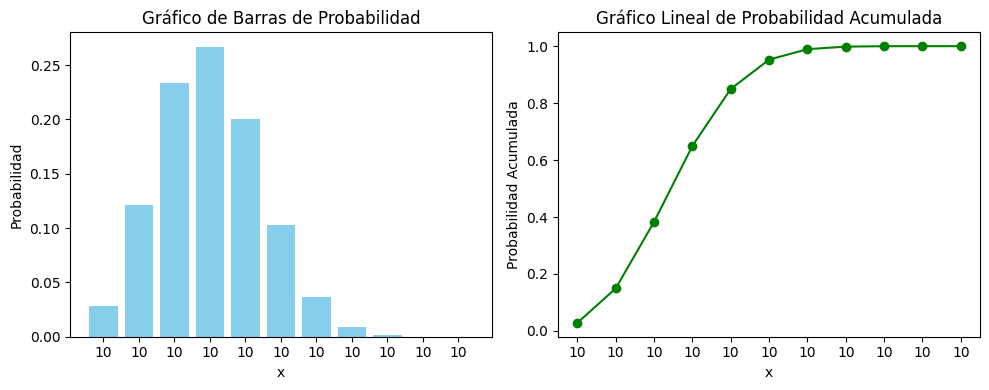

In [19]:
f_graficos_probabilidad_discreta(tabla)

### Valor esperado



In [20]:
VE = n * p
print ("El valor esperado es: ", np.round(VE, 4))

El valor esperado es:  3.0


### Varianza y desviación estándar


In [21]:
varianza = n * p *(1 - p)
print ("La varianza es: ", np.round(varianza, 4))

desv_std = np.sqrt(varianza)
print ("La desviación estándar : ", np.round(desv_std, 4))

La varianza es:  2.1
La desviación estándar :  1.4491


### Visualizar con VE y Desv. Std.



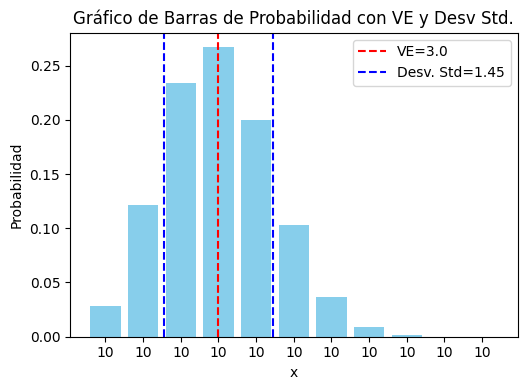

In [22]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)

Significa que puede espera que compren $3$ clientes y puede variar $1.4$ hacia arriba o hacia abajo, es decir de $2$ a $5$ clientes aproximadamente.

## Jugador de basquetbol

Un jugador llamado Rubén Pizarro encesta con probabilidad 0.55. (“La Distribución Binomial o de Bernoulli,” n.d.): Ver enlace https://rpubs.com/rpizarro/1045185

Determinar las probabilidad de los tiros del 0 al 8 con la tabla de probabilidad. $n=8$.

- Determinar la probabilidad de encestar cuatro tiros $f(x=4)$.

- Determinar la probabilidad de encestar todos tiros o sea seis $f(x=6)$.

- Determinar la probabilidad de encestar al menos tres $f(x≤3)$
 o, probabildia acumulda de $F(x=3)$

- Determinar el valor esperado VE

- Determinar la varianza y su desviación estándar

- Interpretar el ejercicio

### Inicializar variables


In [23]:
p = 0.55
q = 1 - p
xi = [0, 1, 2, 3, 4, 5, 6, 7, 8]
n = 8 # Número de ensayos

### Construir tabla

Solo mandar llamar la función previamente creada

In [24]:
tabla = f_tabla_binomial(xi, n, p)
print (tabla)

    x  P(X = x)  P(X <= x)
0  10  0.001682   0.001682
1  10  0.016441   0.018123
2  10  0.070333   0.088456
3  10  0.171925   0.260381
4  10  0.262663   0.523044
5  10  0.256826   0.779870
6  10  0.156949   0.936819
7  10  0.054808   0.991627
8  10  0.008373   1.000000


### Visualizar probabilidades


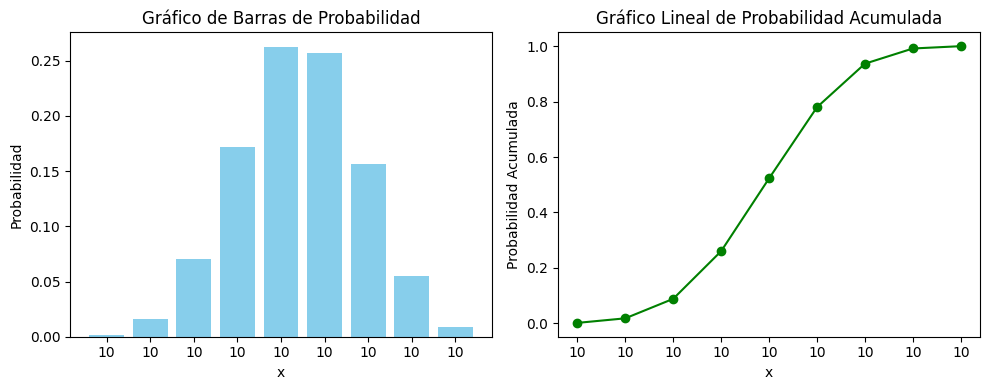

In [25]:
f_graficos_probabilidad_discreta(tabla)

### Valor esperado


In [26]:
VE = n * p
print ("El valor esperado es: ", np.round(VE, 4))

El valor esperado es:  4.4


### Varianza y desviación estándar


In [27]:
varianza = n * p *(1 - p)
print ("La varianza es: ", np.round(varianza, 4))

desv_std = np.sqrt(varianza)
print ("La desviación estándar : ", np.round(desv_std, 4))

La varianza es:  1.98
La desviación estándar :  1.4071


### Visualizar con VE y Desv. Std.


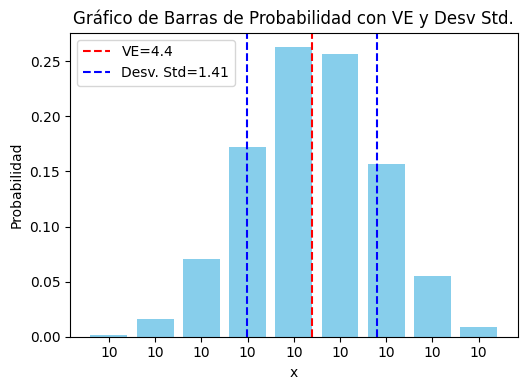

In [28]:
f_graficos_probabilidad_discreta_VE_ds(tabla, VE, desv_std)

## Recuperacón de pacientes

La probabilidad de que un paciente se recupere de una rara enfermedad sanguínea es $0.40\%$. Si se sabe que $n=15$ personas contraen tal enfermedad,

- Determine tabla de probabilidad de 1 al 15, incluyendo el 0.

- Visualizar la gráfica de probabilidades.

- ¿Cuál es la probabilidad de que sobrevivan exactamente cinco? $f(x=5)$

- ¿Cuál es la probabilidad de que sobrevivan al menos diez, $f(x\le10)$.

- ¿Cuál es la probabilidad de que sobrevivan de tres a ocho? y $f(3 \le x \le 8)$

- ¿Cuál es el valor esperado $VE$ o la
esperanza media?

- ¿Cual es la varianza y la desviación estándar?

- ¿Cómo se comportarían las probabilidades para un experimento de 100 personas?

Ejercicio extraído de (Walpole, Myers, and Myers 2012).

**Complementar y construir por parte del alumno repitiendo el mismo proceso que el ejercicio de la tienda y el jugador de basquetbol**.

## Examen

Un estudio refleja que al aplicar un examen de estadística la probabilidad de aprobar (éxito) es del $60\%$, se pide lo siguiente:

- Encuentre la tabla de distribución binomial para 30 estudiantes que presentan el examen

- ¿Cuál es la probabilidad de que aprueben 5 alumnos?, $f(x=5)$.

- ¿Cuál es la probabilidad de que aprueben 10 alumnos?, $f(x=10)$.

- ¿Cuál es la probabilidad de que aprueben 15 o menos alumnos? $f(x \le 15)$.

- ¿Cuál es la probabilidad de que aprueben entre 10 y 20 alumnos?, $f(10 \le x \le 20)$.

- ¿Cuál es la probabilidad de que aprueben mas de 25 alumnos?, $f(x \ge 25)$.

- Determinar el valor esperado VE y su significado.

- Determinar la varianza y su desviación estándard y su significado.

**Complementar y construir por parte del alumno repitiendo el mismo proceso que el ejercicio de la tienda y el jugador de basquetbol**.

## Revisión de contaminantes autobuses

Un grupo de agentes de tránsito sale a una vía principal para revisar el estado de los autobuses de transporte intermunicipal.

De datos históricos se sabe que un $10\%$
de los camiones generan una mayor cantidad de humo de la permitida. En cada jornada los agentes revisan siempre $n=18$ unidades (autobuses).

Se asume que el estado de un autobús es independiente del estado de los otros autobuses. (Hernández 2021).

- Construir la tabla de distribución

- Visualizar la densidad o las probabilidades para cada variable discreta

- Calcular la probabilidad de que se encuentren exactamente 2 buses $f(x=2)$ que generan una mayor cantidad de humo de la permitida.

- Calcular la probabilidad de que el número de autobuses que sobrepasan el límite de generación de gases sea al menos 4, $f(x<4)$

- Calcular la probabilidad de que existan MAS DE TRES (a partir de CUATRO) autobuses que emitan gases por encima de lo permitido en la norma, $f(x > 3)$

- Calcular el valor esperado $VE$.

- Calcular la varianza y la desviación.

- Generar una muestra aleatoria de 100 valores y comparar las frecuencias relativas con las probabilidad originales.

**Complementar y construir por parte del alumno repitiendo el mismo proceso que el ejercicio de la tienda y el jugador de basquetbol**.

# Interpretación

Contestar las preguntas del cada ejercicio

- Preguntas de los compradores de la tienda
- Preguntas del jugador de basquetbol
- Preguntas de la recuperación de pacientes
- Preguntas del examen
- Preguntas de revisión de autobuses


# Bibliografía

- Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.

- Mendenhall, William, Robert J. Beaver, and Barbara M. Beaver. 2006. Introducción a La Probabilidad y Estadística. 13a Edición.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.